In [5]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [6]:
columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [13]:
# adding two extra features
# source: FRED, month before election

columns = ['Year','Civilian Unemployment Rate']

data = [[1952,2.80],
        [1956,4.30],
        [1960,6.10],
        [1964,4.80],
        [1968,3.40],
        [1972,5.30],
        [1976,7.70],
        [1980,7.50],
        [1984,7.40],
        [1988,5.30],
        [1992,7.40],
        [1996,5.40],
        [2000,3.90],
        [2004,5.40],
        [2008,6.80],
        [2012,7.90], 
        [2016,4.70]]
        
unemployment = pd.DataFrame(data=data, columns=columns)

In [19]:
# Problem uploading data from desktop on mac?

# gdp_change = pd.read_csv('desktop/download.csv', header=None)
# gdp_change.head()

In [20]:
# source: BEA, National Income and product accounts, table 1.17.1

columns = ['Year','GDP Change']

data = [[1952,4.10],
        [1956,2.10],
        [1960,2.60],
        [1964,5.80],
        [1968,4.90],
        [1972,5.30],
        [1976,5.40],
        [1980,-0.30],
        [1984,7.20],
        [1988,4.20],
        [1992,3.50],
        [1996,3.80],
        [2000,4.10],
        [2004,3.80],
        [2008,-0.10],
        [2012,2.20], 
        [2016,1.60]]
        
gdp_change = pd.DataFrame(data=data, columns=columns)

In [41]:
columns = ['Year','US Military Fatalities per Million']

data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

In [42]:
df = votes.merge(growth).merge(unemployment).merge(gdp_change).merge(deaths)
print(df.shape)
df.head()

(17, 8)


,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,Civilian Unemployment Rate,GDP Change,US Military Fatalities per Million
0,1952,Stevenson,Eisenhower,44.60,2.40,2.8,4.1,190
1,1956,Eisenhower,Stevenson,57.76,2.89,4.3,2.1,0
2,1960,Nixon,Kennedy,49.91,0.85,6.1,2.6,0
3,1964,Johnson,Goldwater,61.34,4.21,4.8,5.8,1
4,1968,Humphrey,Nixon,49.60,3.02,3.4,4.9,146


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [23]:
model = LinearRegression()

In [43]:
features = ['Average Recent Growth in Personal Incomes',
            'GDP Change',
            'Civilian Unemployment Rate',
            'US Military Fatalities per Million']
target = 'Incumbent Party Vote Share'
X = df[features]
y = df[target]

In [44]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
y_pred = model.predict(X)

In [47]:
# After experimenting, got lowest MAE of 1.34 with using four variables

print('4 Variable Regression MAE: ', mean_absolute_error(y, y_pred))

4 Variable Regression MAE:  1.3424122859187748


In [48]:
df['Linear Regression, 4 features'] = y_pred

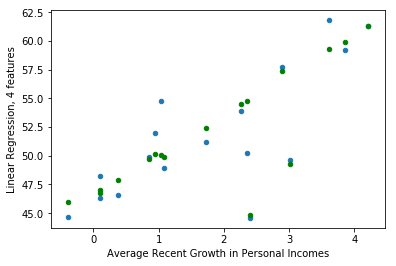

In [50]:
ax = df.plot(x='Average Recent Growth in Personal Incomes',
             y='Incumbent Party Vote Share',
             kind='scatter');
df.plot(x='Average Recent Growth in Personal Incomes',
        y='Linear Regression, 4 features', 
        color='green',
        kind='scatter',
        ax=ax);

In [52]:
# Trying pandas read html webscraping
# Had trouble parsing the specifics

tables = pd.read_html('https://en.wikipedia.org/wiki/United_States_military_casualties_of_war#Wars_ranked_by_total_number_of_U.S._military_deaths')
print(tables[0])

                                      War or conflict          Date  \
                                      War or conflict          Date   
0                          American Revolutionary War     1775–1783   
1                                Northwest Indian War     1785–1796   
2                                           Quasi-War     1798–1800   
3                                   First Barbary War     1801–1805   
4                       Other actions against pirates     1800–1900   
5                           Chesapeake–Leopard Affair          1807   
6                                         War of 1812     1812–1815   
7                                  Nuka Hiva Campaign     1813–1814   
8                                           Creek War     1813–1814   
9                                  Second Barbary War          1815   
10                                 First Seminole War     1817–1818   
11                          First Sumatran Expedition          1832   
12    

In [56]:
war_df, = pd.read_html('https://en.wikipedia.org/wiki/United_States_military_casualties_of_war#Wars_ranked_by_total_number_of_U.S._military_deaths',
                      header=0)

ValueError: too many values to unpack (expected 1)

In [55]:
pd.read_html?

In [ ]:
# Spurious correlation?
# Rainfall. Source: https://www.statista.com/statistics/500472/annual-average-temperature-in-the-us/
# Didn't work, had to pay for data more specific than per decade

# columns = ['Year','Average Annual US Temp']

# data = [[1952,190],
#         [1956,  0],
#         [1960,  0],
#         [1964,  1],
#         [1968,146],
#         [1972,  0],
#         [1976,  2],
#         [1980,  0],
#         [1984,  0],
#         [1988,  0],
#         [1992,  0],
#         [1996,  0],
#         [2000,  0],
#         [2004,  4],
#         [2008, 14],
#         [2012,  5], 
#         [2016,  5]]
        
# deaths = pd.DataFrame(data=data, columns=columns)